In [65]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.dates as mdates

EV = pd.read_csv("EVIO_history_01-06-2022_31-05-2023.csv", sep=';')

# Convert strings to float
EV['Duration (min)'] = EV['Duration (min)'].str.replace(',', '.').astype(float)
EV['Total Energy (kWh)'] = EV['Total Energy (kWh)'].str.replace(',', '.').astype(float)
EV['Start date'] = pd.to_datetime(EV['Start date'], format='%m/%d/%Y | %H:%M')
EV['Stop date'] = pd.to_datetime(EV['Stop date'], format='%m/%d/%Y | %H:%M')

# Crie uma nova coluna 'Period of Day' com base na hora
EV['Period of Day'] = pd.cut(EV['Start date'].dt.hour, bins=[0, 12, 18, 24], labels=['Manhã', 'Tarde', 'Noite'])

# Adicione a coluna 'Day of Week'
EV['Day of Week'] = EV['Start date'].dt.day_name()

# Crie uma nova coluna 'Season' com base no mês (usando o hemisfério norte como referência)
EV['Month'] = EV['Start date'].dt.month
EV['Season'] = EV['Month'].apply(lambda x: 'Inverno' if x in [1, 2, 12] else ('Primavera' if x in [3, 4, 5] else ('Verão' if x in [6, 7, 8] else 'Outono')))

# Crie uma nova coluna 'Período Escolar' com base no mês
EV['Período Escolar'] = EV['Month'].apply(lambda x: 'Férias' if x in [7, 8] else 'Período Escolar')

# Mapeando categorias para números
period_of_day_mapping = {'Manhã': 1, 'Tarde': 2, 'Noite': 3}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
season_mapping = {'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4}
periodo_escolar_mapping = {'Férias': 1, 'Período Escolar': 2}

EV['Period of Day'] = EV['Period of Day'].map(period_of_day_mapping)
EV['Day of Week'] = EV['Day of Week'].map(day_of_week_mapping)
EV['Season'] = EV['Season'].map(season_mapping)
EV['Período Escolar'] = EV['Período Escolar'].map(periodo_escolar_mapping)



In [69]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#X = EV[['Duration (min)', 'Total Energy (kWh)', 'Period of Day', 'Day of Week', 'Month',  'Season', 'Período Escolar' ]]
X = EV[['Month', 'Duration (min)']]
X.info()

# Execute o K-Means para diferentes números de clusters e armazene a inércia
inertia = []
for i in range(1, 11):  # Tente diferentes números de clusters de 1 a 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plote a curva de cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           117 non-null    int64  
 1   Duration (min)  117 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


AttributeError: 'NoneType' object has no attribute 'split'

For n_clusters = 2, the average silhouette_score is : 0.21568769400452945
For n_clusters = 3, the average silhouette_score is : 0.2528670036679084
For n_clusters = 4, the average silhouette_score is : 0.23817910028394987
For n_clusters = 5, the average silhouette_score is : 0.22327037097479274
For n_clusters = 6, the average silhouette_score is : 0.23605739304304224
For n_clusters = 7, the average silhouette_score is : 0.26938821335911295
For n_clusters = 8, the average silhouette_score is : 0.2712658834284697
For n_clusters = 9, the average silhouette_score is : 0.2393474654645592
For n_clusters = 10, the average silhouette_score is : 0.24995749675241877


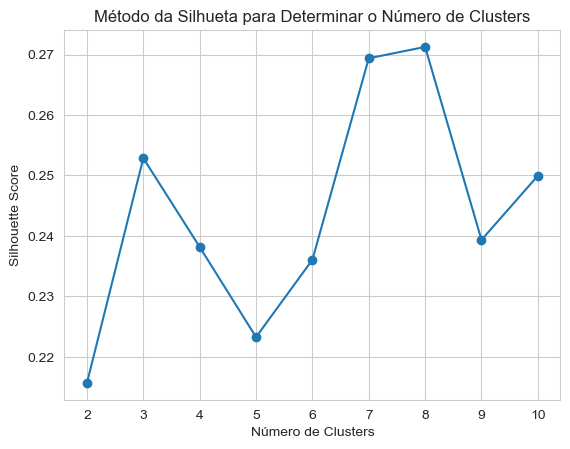

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Selecionar as variáveis para o modelo K-Means
X = EV[['Duration (min)', 'Total Energy (kWh)', 'Period of Day', 'Day of Week', 'Month',  'Season', 'Período Escolar' ]]

# Padronizar as variáveis (importante para o K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista para armazenar os valores de silhouette
silhouette_scores = []

# Testar diferentes números de clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plote a curva de silhueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Método da Silhueta para Determinar o Número de Clusters')
plt.show()


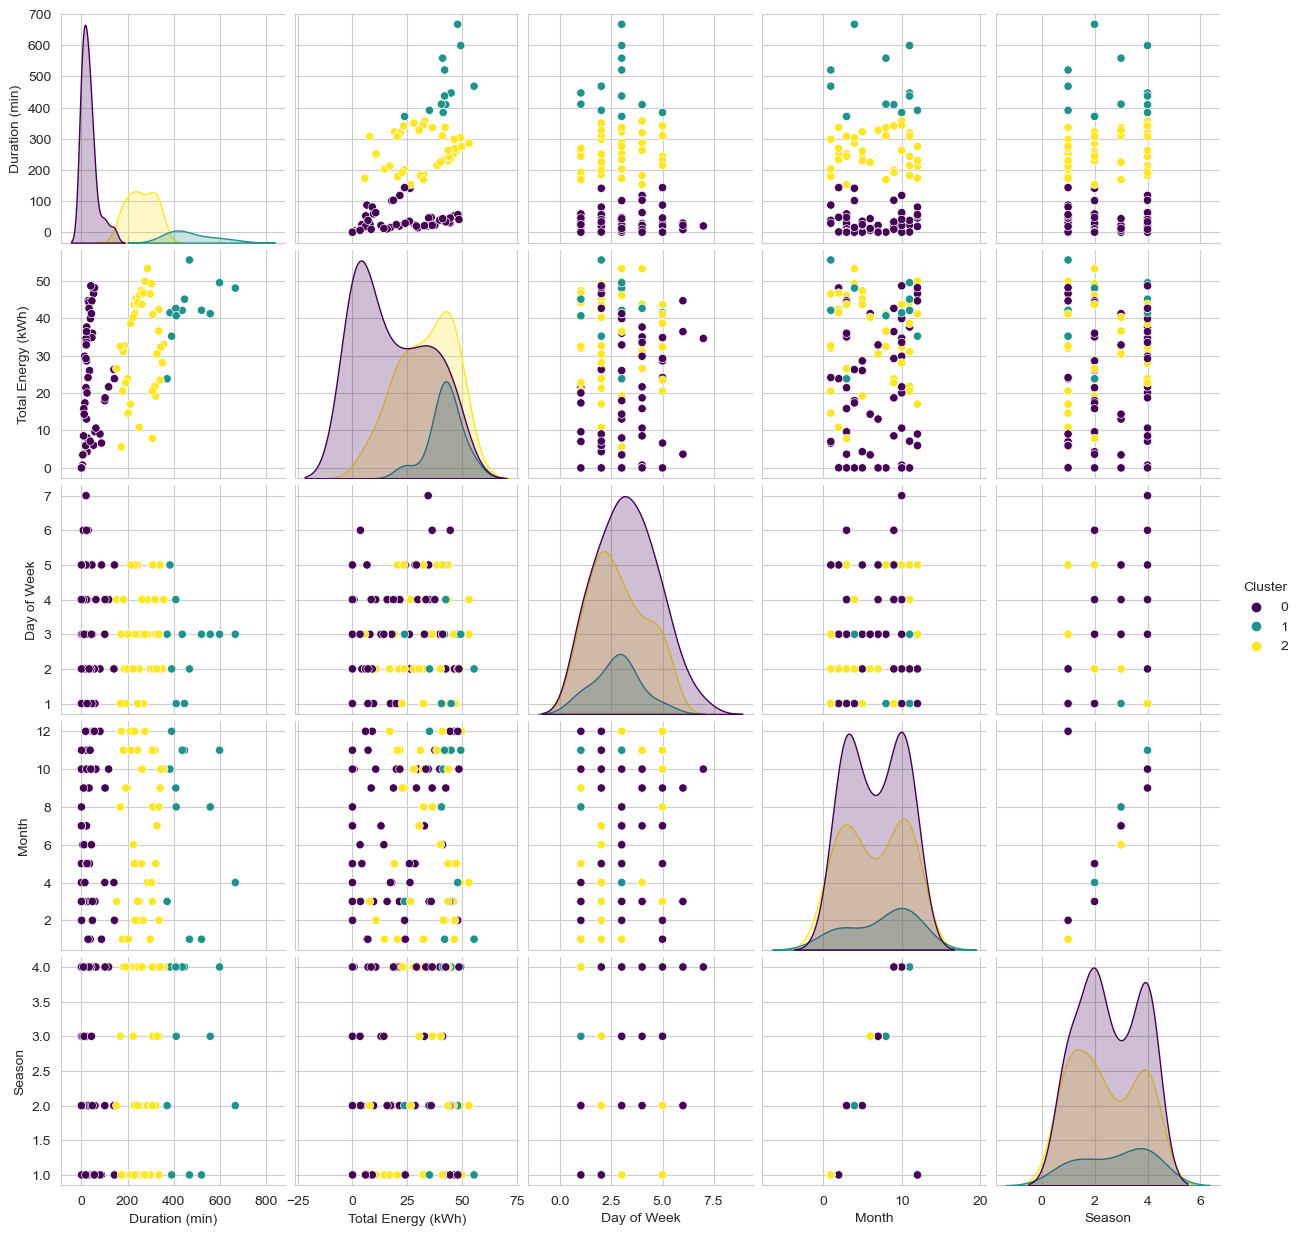

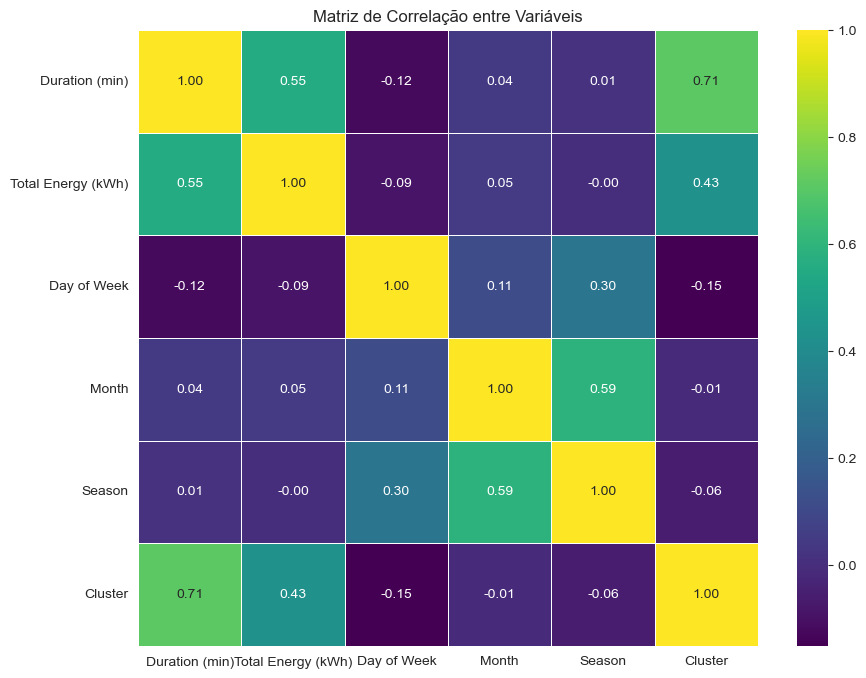

In [77]:
import seaborn as sns

# Selecione um subconjunto de variáveis para o pair plot
selected_variables = ['Duration (min)', 'Total Energy (kWh)', 'Day of Week', 'Month', 'Season']

# Adicione a coluna de clusters ao conjunto de dados
data_with_clusters = EV.copy()
data_with_clusters['Cluster'] = clusters

# Crie um pair plot usando seaborn
sns.pairplot(data_with_clusters, hue='Cluster', vars=selected_variables, palette='viridis')
plt.show()

selected_variables = ['Duration (min)', 'Total Energy (kWh)', 'Day of Week', 'Month', 'Season', 'Cluster']

# Criar um DataFrame com as variáveis selecionadas
data_selected = data_with_clusters[selected_variables]

# Calcular a matriz de correlação
correlation_matrix = data_selected.corr()

# Criar um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()


        Duration (min)                                                       \
                 count        mean        std      min        25%       50%   
Cluster                                                                       
0                 63.0   31.778095  33.951782    0.017    5.37500   22.5500   
1                 12.0  471.848667  94.328545  371.467  404.52925  441.7915   
2                 42.0  259.325000  58.896629  153.083  212.60425  255.7920   

                          Total Energy (kWh)             ... Season       \
               75%    max              count       mean  ...    75%  max   
Cluster                                                  ...               
0         44.48350  143.1               63.0  18.540317  ...    4.0  4.0   
1        529.82475  666.9               12.0  42.238333  ...    4.0  4.0   
2        309.01650  356.7               42.0  33.343333  ...    4.0  4.0   

        Período Escolar                                             

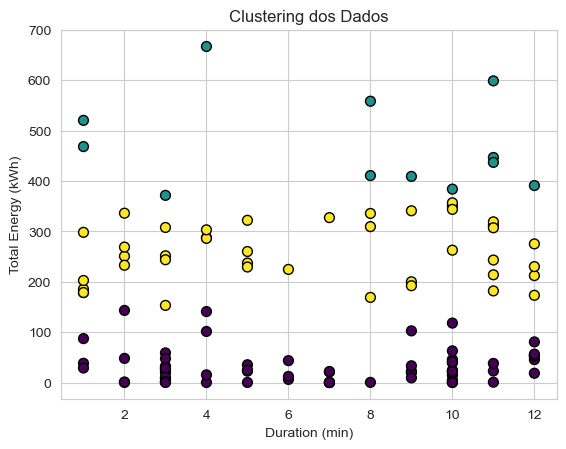

C:\Users\miguel.preto\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Day of Week
- Period of Day
- Período Escolar
- Season
- Total Energy (kWh)
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 7 features, but KMeans is expecting 2 features as input.

In [72]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicionar a coluna de clusters aos dados originais
EV['Cluster'] = clusters

# Examinar as estatísticas descritivas de cada cluster
print(EV.groupby('Cluster').describe())

# Exemplo de visualização com duas variáveis
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Clustering dos Dados')
plt.xlabel('Duration (min)')
plt.ylabel('Total Energy (kWh)')
plt.show()


# Agora, você pode atribuir novos pontos de dados a esses clusters
new_data = pd.DataFrame({
    'Duration (min)': [40, 250, 150],
    'Total Energy (kWh)': [20, 35, 25],
    'Period of Day': [1, 2, 3],
    'Day of Week': [3, 5, 1],
    'Month': [8, 6, 4],
    'Season': [3, 2, 1],
    'Período Escolar': [2, 1, 2]
})

# Certifique-se de que as colunas e tipos correspondam ao seu conjunto de dados original
new_data['Period of Day'] = new_data['Period of Day'].astype('category')

# Realize a mesma transformação que você fez nos dados originais
# ... (remova ou ajuste colunas, substitua NaNs, etc.)

# Agora, preveja os clusters para os novos dados
new_clusters = kmeans.predict(new_data)

# Adicione a coluna de clusters aos novos dados
new_data['Cluster'] = new_clusters

# Os novos dados agora têm uma coluna indicando a qual cluster pertencem
print(new_data)

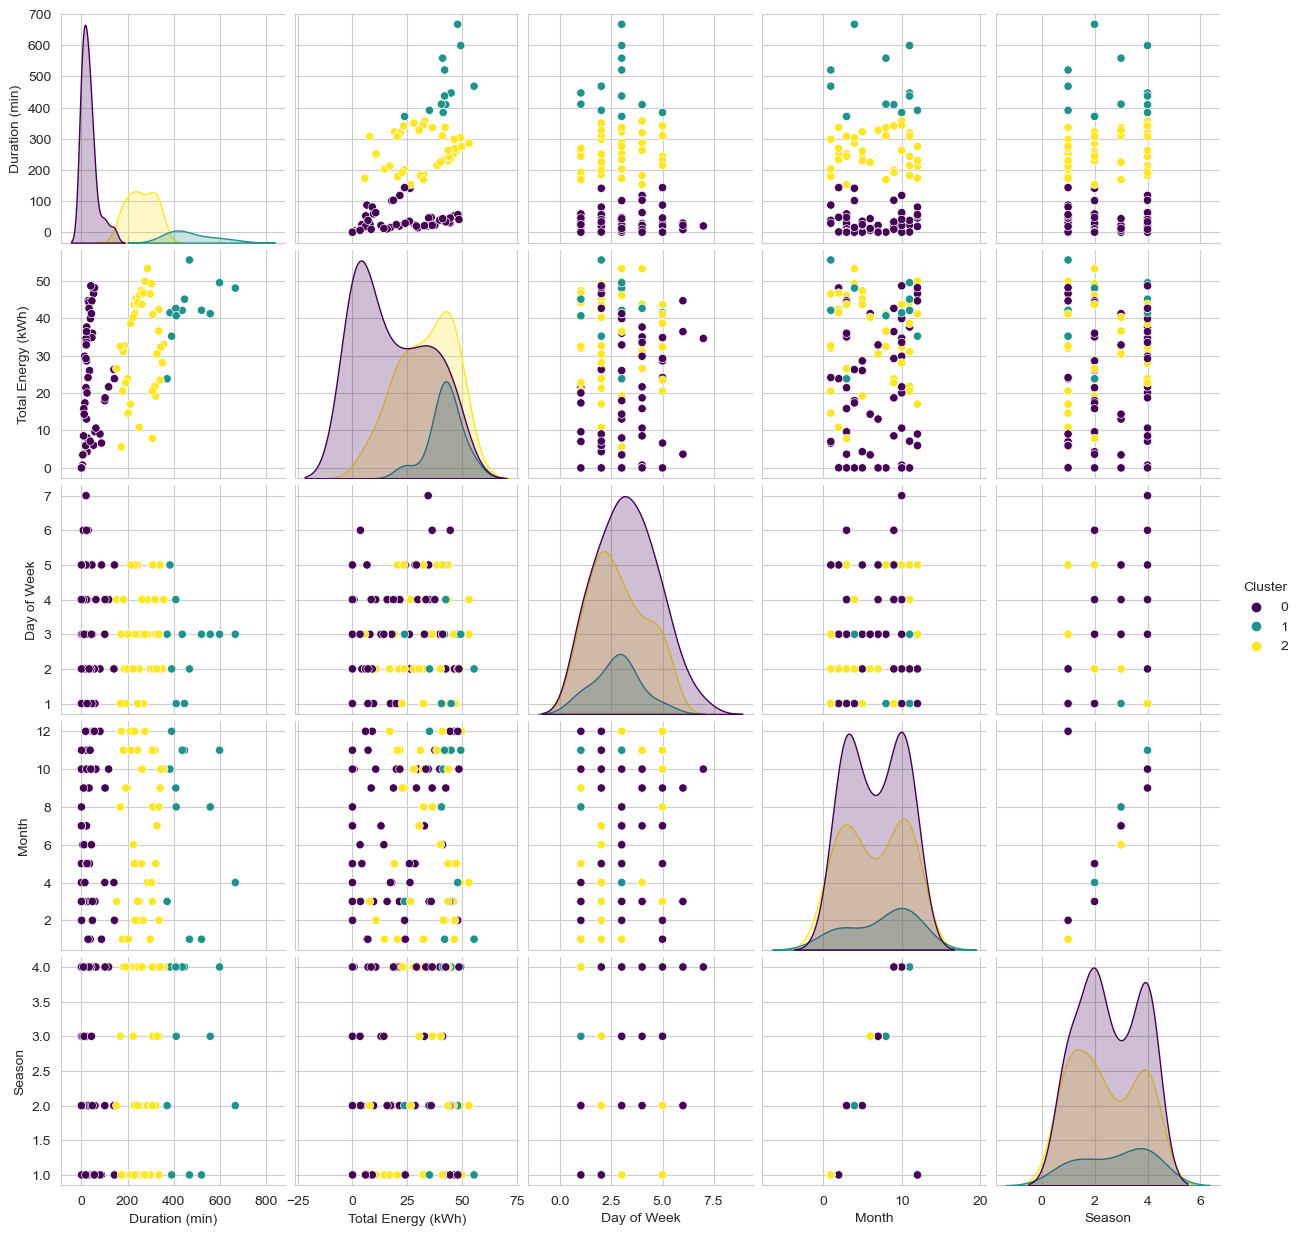

In [46]:
import seaborn as sns

# Selecione um subconjunto de variáveis para o pair plot
selected_variables = ['Duration (min)', 'Total Energy (kWh)', 'Day of Week', 'Month', 'Season']

# Adicione a coluna de clusters ao conjunto de dados
data_with_clusters = EV.copy()
data_with_clusters['Cluster'] = clusters

# Crie um pair plot usando seaborn
sns.pairplot(data_with_clusters, hue='Cluster', vars=selected_variables, palette='viridis')
plt.show()

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecione as variáveis para o modelo K-Means (por exemplo, 'Duration (min)' e 'Total Energy (kWh)')
X = EV[['Duration (min)', 'Total Energy (kWh)', 'Month', 'Season', 'Período Escolar' ]]

# Converta variáveis categóricas em variáveis dummy (one-hot encoding)
X = pd.get_dummies(X, columns=['Month', 'Season', 'Período Escolar'], prefix=['Month', 'Season', 'Período Escolar'])

# Execute o K-Means para diferentes números de clusters e armazene a inércia
inertia = []
for i in range(1, 11):  # Tente diferentes números de clusters de 1 a 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plote a curva de cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.show()

# Aplique o K-Means com o número escolhido de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicione a coluna de clusters aos dados originais
EV['Cluster'] = clusters

# Visualizar os clusters
# Lembre-se de ajustar as variáveis usadas para visualização com base nas suas necessidades
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Clustering dos Dados')
plt.xlabel('Variável 1')
plt.ylabel('Variável 2')
plt.show()


AttributeError: 'NoneType' object has no attribute 'split'

In [4]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Start date                              117 non-null    datetime64[ns]
 1   Stop date                               117 non-null    datetime64[ns]
 2   Network                                 117 non-null    object        
 3   Fleet                                   117 non-null    object        
 4   report_ev                               117 non-null    object        
 5   Group                                   117 non-null    object        
 6   User                                    117 non-null    object        
 7   Charging Station                        117 non-null    object        
 8   City                                    117 non-null    object        
 9   Duration (min)                          117 non-null  

In [ ]:
EV.describe()

In [ ]:
EV.head()

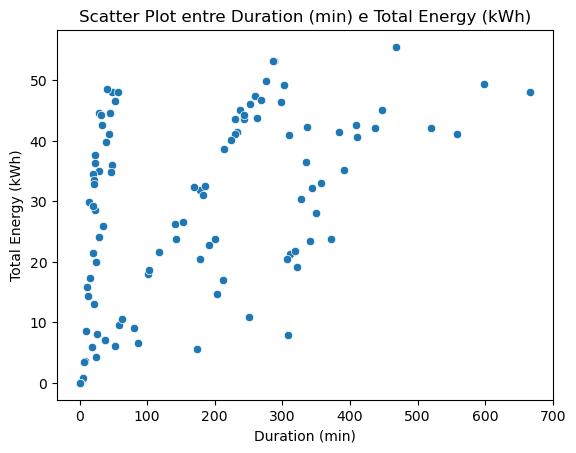

In [5]:
# Scatter plot entre "Duration (min)" e "Total Energy (kWh)"
sns.scatterplot(x='Duration (min)', y='Total Energy (kWh)', data=EV)
plt.title('Scatter Plot entre Duration (min) e Total Energy (kWh)')
plt.show()

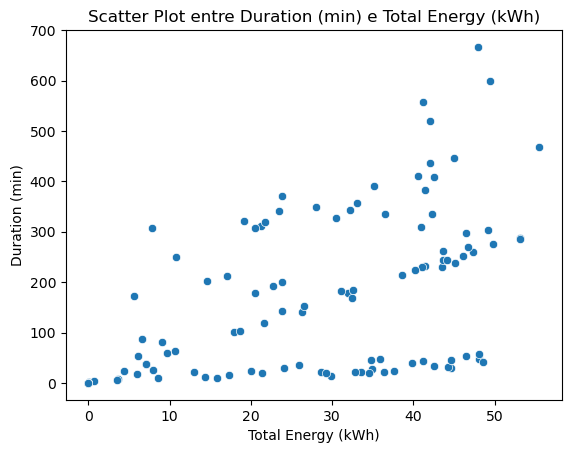

In [6]:
# Scatter plot entre "Duration (min)" e "Total Energy (kWh)"
sns.scatterplot(x='Total Energy (kWh)', y='Duration (min)', data=EV)
plt.title('Scatter Plot entre Duration (min) e Total Energy (kWh)')
plt.show()

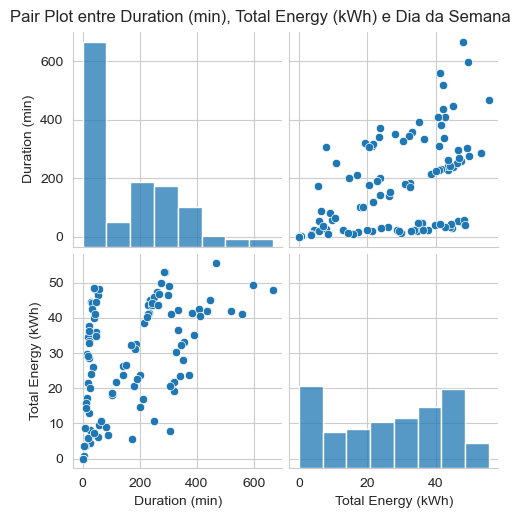

In [7]:
# Selecione as colunas relevantes
columns_to_plot = ['Duration (min)', 'Total Energy (kWh)', 'Day of Week']

# Configure o estilo do seaborn
sns.set_style('whitegrid')

# Crie um pairplot
#sns.pairplot(EV[columns_to_plot], hue='Day of Week', palette='viridis', height=3)
sns.pairplot(EV[columns_to_plot])

# Adicione um título
plt.suptitle('Pair Plot entre Duration (min), Total Energy (kWh) e Dia da Semana', y=1.02)

# Exiba o gráfico
plt.show()

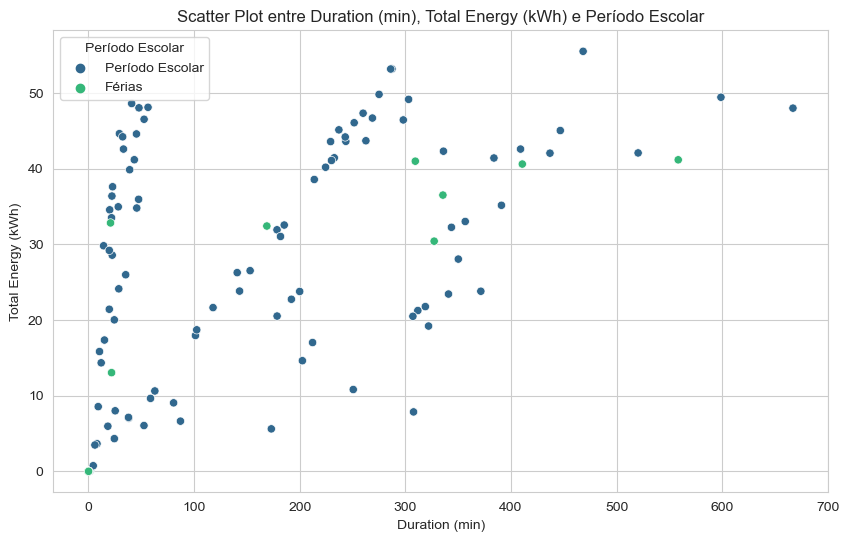

In [8]:
# Configure o estilo do seaborn
sns.set_style('whitegrid')

# Crie um scatter plot com duração, energia e colorido por dia da semana
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (min)', y='Total Energy (kWh)', data=EV, hue='Período Escolar', palette='viridis', markers='o')

# Adicione um título
plt.title('Scatter Plot entre Duration (min), Total Energy (kWh) e Período Escolar')

# Exiba a legenda
plt.legend(title='Período Escolar')

# Exiba o gráfico
plt.show()

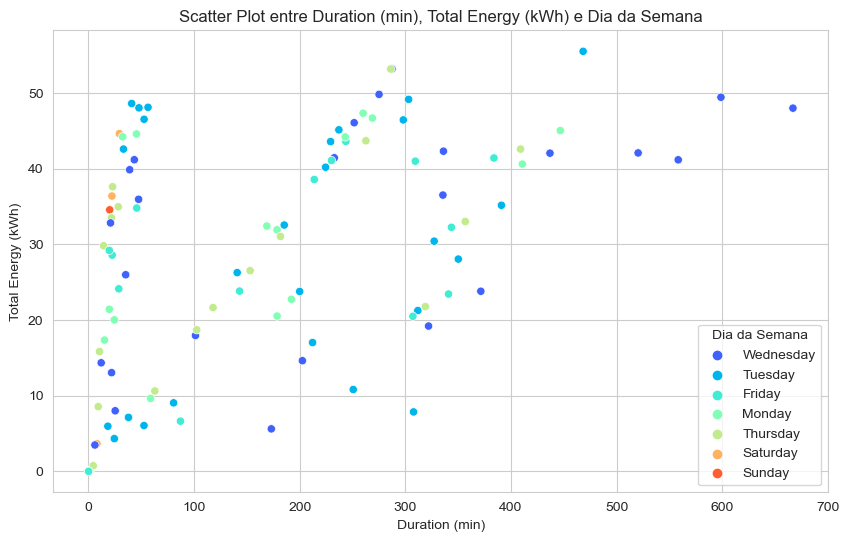

In [9]:
# Configure o estilo do seaborn
sns.set_style('whitegrid')

# Crie um scatter plot com duração, energia e colorido por dia da semana
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (min)', y='Total Energy (kWh)', data=EV, hue='Day of Week', palette='rainbow', markers='o')

# Adicione um título
plt.title('Scatter Plot entre Duration (min), Total Energy (kWh) e Dia da Semana')

# Exiba a legenda
plt.legend(title='Dia da Semana')

# Exiba o gráfico
plt.show()

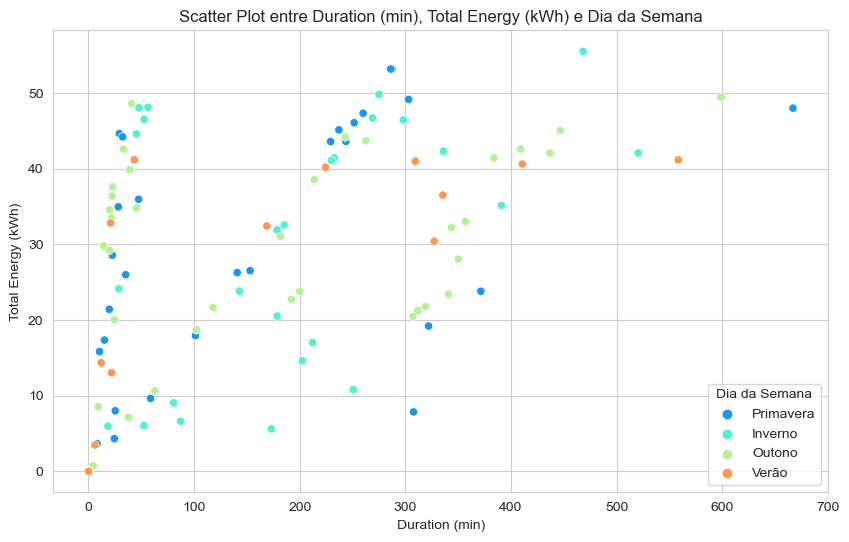

In [10]:
# Configure o estilo do seaborn
sns.set_style('whitegrid')

# Crie um scatter plot com duração, energia e colorido por dia da semana
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (min)', y='Total Energy (kWh)', data=EV, hue='Season', palette='rainbow', markers='o')

# Adicione um título
plt.title('Scatter Plot entre Duration (min), Total Energy (kWh) e Dia da Semana')

# Exiba a legenda
plt.legend(title='Dia da Semana')

# Exiba o gráfico
plt.show()

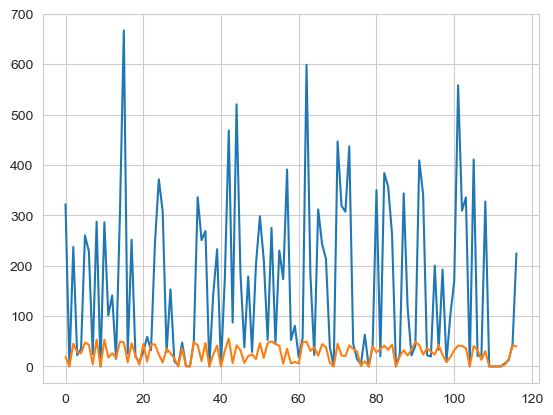

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecione as variáveis para o modelo K-Means (por exemplo, 'Duration (min)' e 'Total Energy (kWh)')
X = EV[['Duration (min)', 'Total Energy (kWh)']]
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)
plt.plot(X)
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecione as variáveis para o modelo K-Means (por exemplo, 'Duration (min)' e 'Total Energy (kWh)')
X = EV[['Duration (min)', 'Total Energy (kWh)']]

# Padronize as variáveis (importante para o K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Execute o K-Means para diferentes números de clusters e armazene a inércia
inertia = []
for i in range(1, 11):  # Tente diferentes números de clusters de 1 a 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plote a curva de cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.show()



AttributeError: 'NoneType' object has no attribute 'split'

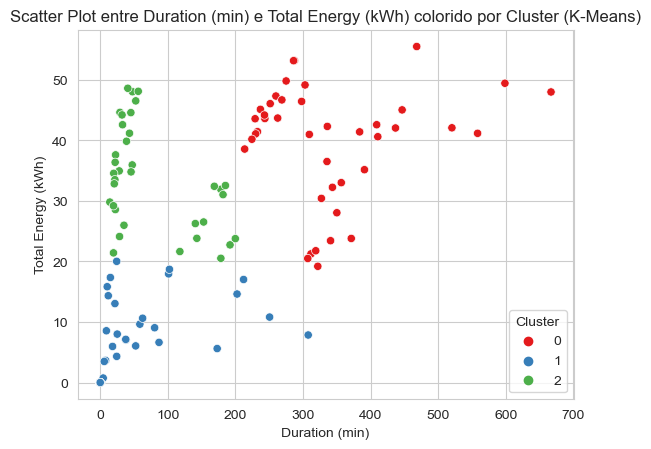

In [11]:
from sklearn.preprocessing import StandardScaler

# Selecione as variáveis para o modelo K-Means (por exemplo, 'Duration (min)' e 'Total Energy (kWh)')
X = EV[['Duration (min)', 'Total Energy (kWh)']]

# Padronize as variáveis (importante para o K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escolha o número de clusters (você pode ajustar conforme necessário)
n_clusters = 3

# Aplique o modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
EV['Cluster'] = kmeans.fit_predict(X_scaled)

# Configure o estilo do seaborn
sns.set_style('whitegrid')

# Crie um scatter plot colorido pelos clusters
sns.scatterplot(x='Duration (min)', y='Total Energy (kWh)', data=EV, hue='Cluster', palette='Set1', markers="o")

# Adicione um título
plt.title('Scatter Plot entre Duration (min) e Total Energy (kWh) colorido por Cluster (K-Means)')

# Exiba o gráfico
plt.show()

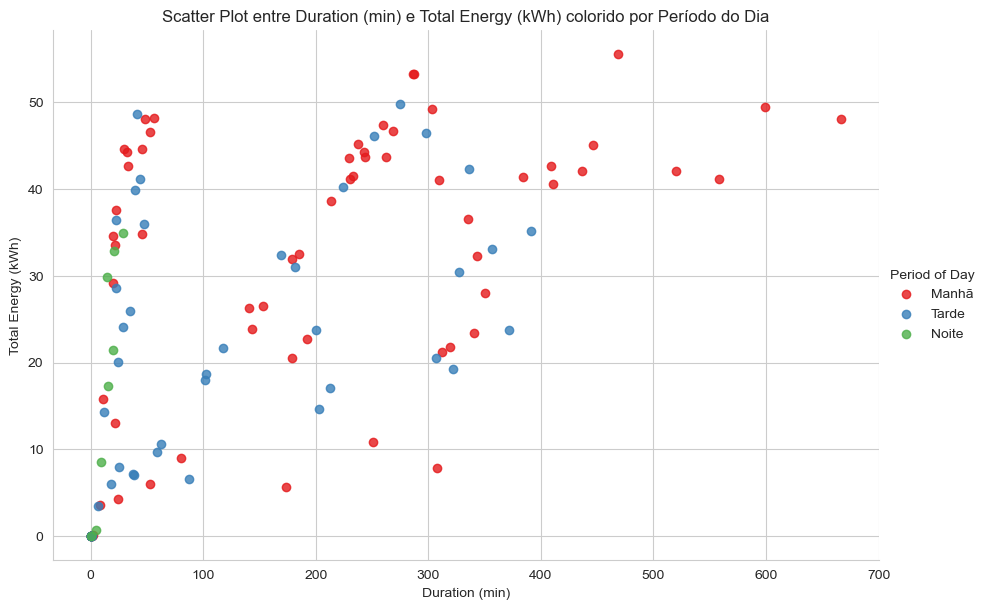

In [2]:
# Converta a coluna 'Start date' para o tipo datetime, se necessário
EV['Start date'] = pd.to_datetime(EV['Start date'])

# Crie uma nova coluna 'Period of Day' com base na hora
EV['Period of Day'] = pd.cut(EV['Start date'].dt.hour, bins=[0, 12, 18, 24], labels=['Manhã', 'Tarde', 'Noite'])

# Configure o estilo do seaborn
sns.set_style('whitegrid')

# Crie um lmplot colorido pela coluna 'Period of Day'
sns.lmplot(x='Duration (min)', y='Total Energy (kWh)', data=EV, hue='Period of Day', fit_reg=False, height=6, palette='Set1', aspect=1.5, markers="o")

# Adicione um título
plt.title('Scatter Plot entre Duration (min) e Total Energy (kWh) colorido por Período do Dia')

# Exiba o gráfico
plt.show()



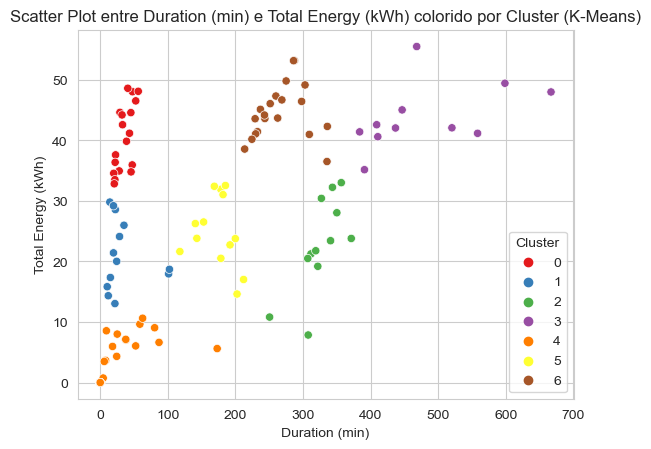

In [83]:
from sklearn.preprocessing import StandardScaler

# Selecione as variáveis para o modelo K-Means (por exemplo, 'Duration (min)' e 'Total Energy (kWh)')
X = EV[['Duration (min)', 'Total Energy (kWh)']]

# Padronize as variáveis (importante para o K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escolha o número de clusters (você pode ajustar conforme necessário)
n_clusters = 7

# Aplique o modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
EV['Cluster'] = kmeans.fit_predict(X_scaled)


# Configure o estilo do seaborn
sns.set_style('whitegrid')

# Crie um scatter plot colorido pelos clusters
sns.scatterplot(x='Duration (min)', y='Total Energy (kWh)', data=EV, hue='Cluster', palette='Set1', markers="o")

# Adicione um título
plt.title('Scatter Plot entre Duration (min) e Total Energy (kWh) colorido por Cluster (K-Means)')

# Exiba o gráfico
plt.show()

Mean Squared Error: 181.5652210897457


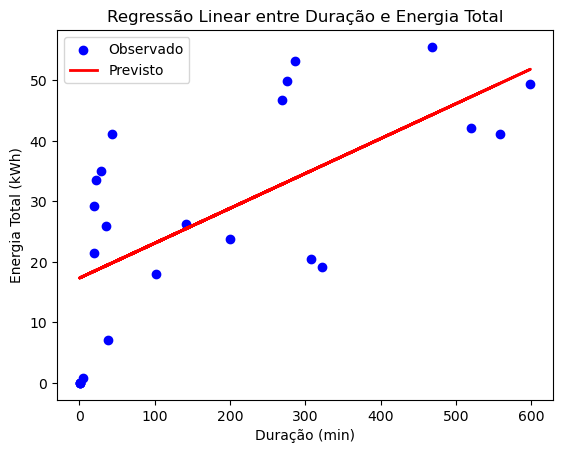

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecione as variáveis para a regressão linear
X = EV[['Duration (min)']]
y = EV['Total Energy (kWh)']

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialize o modelo de regressão linear
model = LinearRegression()

# Treine o modelo
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcule a métrica de erro (por exemplo, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize os resultados
plt.scatter(X_test, y_test, color='blue', label='Observado')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Previsto')
plt.title('Regressão Linear entre Duração e Energia Total')
plt.xlabel('Duração (min)')
plt.ylabel('Energia Total (kWh)')
plt.legend()
plt.show()

Mean Squared Error - Wednesday: 184.8699949771525


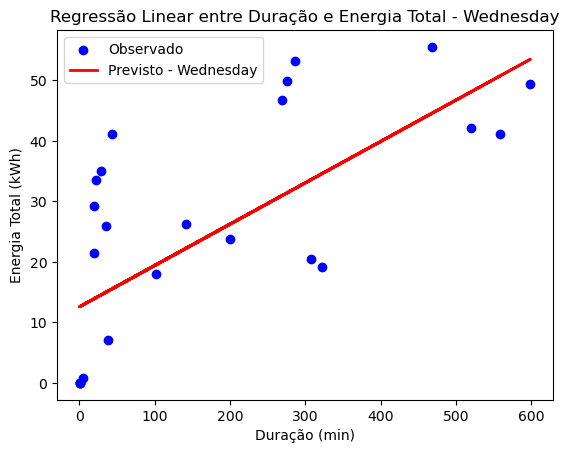

Mean Squared Error - Tuesday: 244.91970895257586


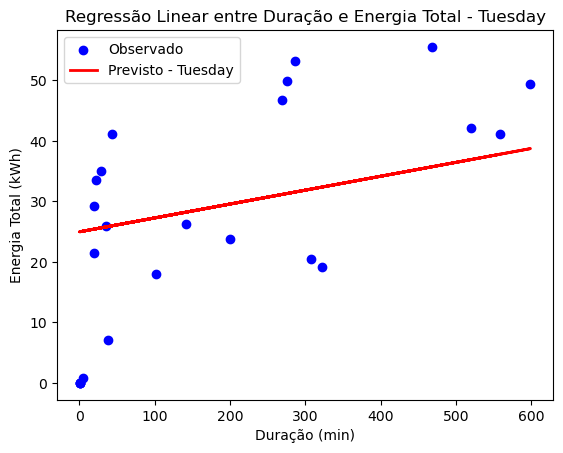

Mean Squared Error - Friday: 182.74022889089133


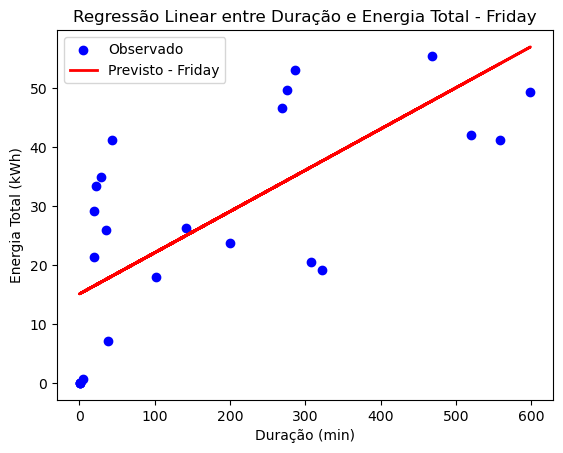

Mean Squared Error - Monday: 192.48652003989295


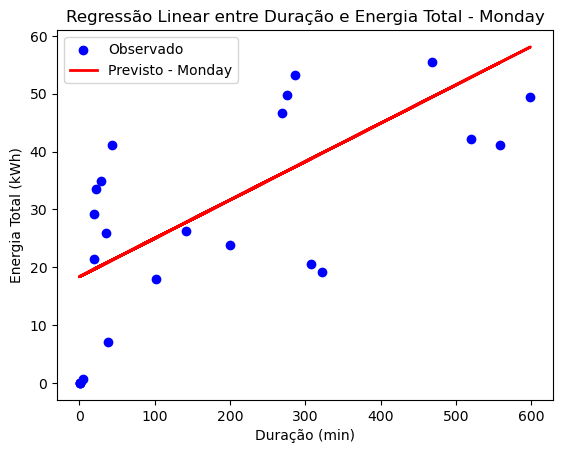

Mean Squared Error - Thursday: 185.1559535788166


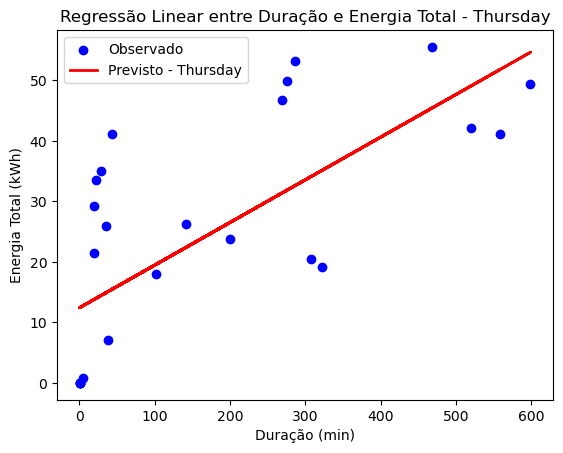

Mean Squared Error - Saturday: 239608.9099260664


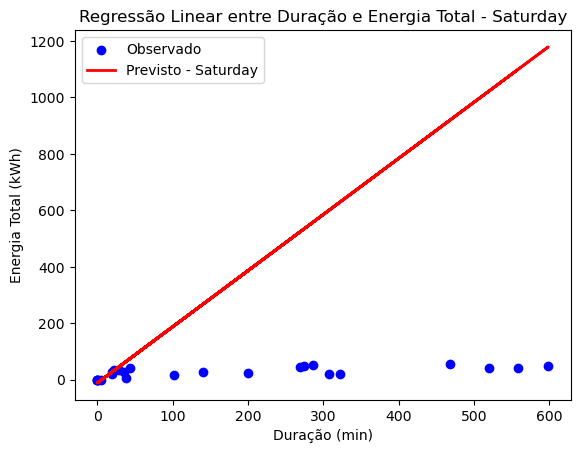

Mean Squared Error - Sunday: 390.5457375000001


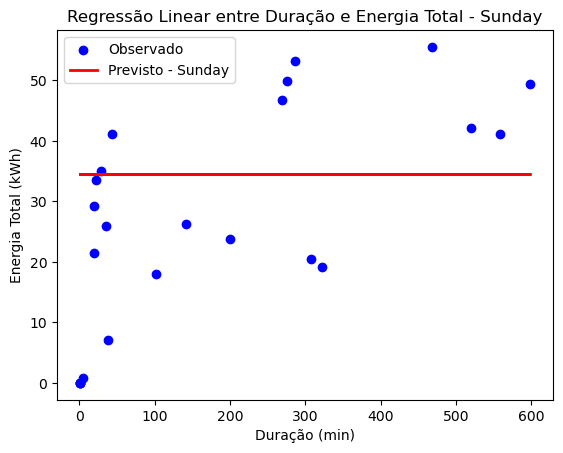

In [15]:


# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(EV[['Duration (min)']], EV['Total Energy (kWh)'], test_size=0.2, random_state=42)

# Inicialize o modelo de regressão linear
model = LinearRegression()

# Crie subconjuntos de dados para cada dia da semana
for day in EV['Day of Week'].unique():
    subset_X_train = X_train[X_train.index.isin(y_train[y_train.index.isin(EV[EV['Day of Week'] == day].index)].index)]
    subset_y_train = y_train[y_train.index.isin(EV[EV['Day of Week'] == day].index)]

    # Treine o modelo
    model.fit(subset_X_train, subset_y_train)

    # Faça previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcule a métrica de erro (por exemplo, MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error - {day}: {mse}')

    # Visualize os resultados
    plt.scatter(X_test, y_test, color='blue', label='Observado')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label=f'Previsto - {day}')
    plt.title(f'Regressão Linear entre Duração e Energia Total - {day}')
    plt.xlabel('Duração (min)')
    plt.ylabel('Energia Total (kWh)')
    plt.legend()
    plt.show()


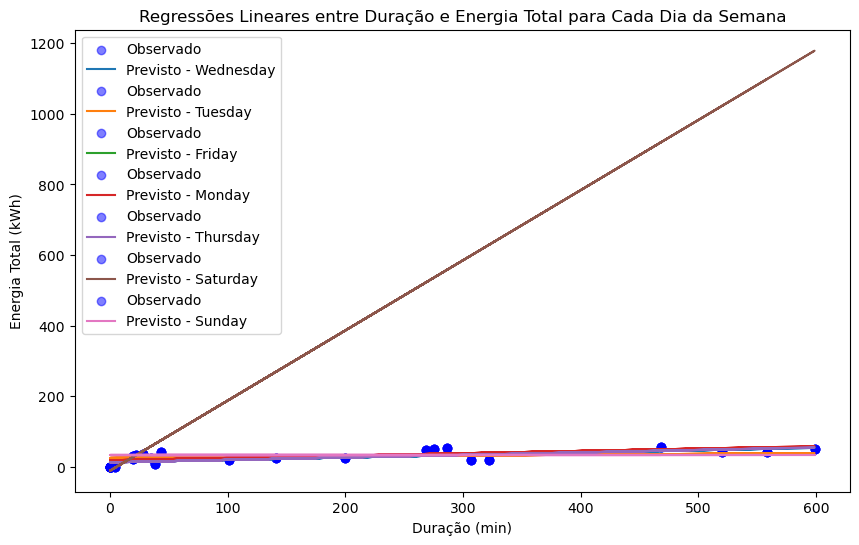

In [16]:


# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(EV[['Duration (min)']], EV['Total Energy (kWh)'], test_size=0.2, random_state=42)

# Inicialize o modelo de regressão linear
model = LinearRegression()

# Crie um único gráfico com todas as regressões lineares
plt.figure(figsize=(10, 6))

for day in EV['Day of Week'].unique():
    subset_X_train = X_train[X_train.index.isin(y_train[y_train.index.isin(EV[EV['Day of Week'] == day].index)].index)]
    subset_y_train = y_train[y_train.index.isin(EV[EV['Day of Week'] == day].index)]

    # Treine o modelo
    model.fit(subset_X_train, subset_y_train)

    # Faça previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Visualize os resultados
    plt.scatter(X_test, y_test, color='blue', label='Observado', alpha=0.5)
    plt.plot(X_test, y_pred, label=f'Previsto - {day}')

plt.title('Regressões Lineares entre Duração e Energia Total para Cada Dia da Semana')
plt.xlabel('Duração (min)')
plt.ylabel('Energia Total (kWh)')
plt.legend()
plt.show()


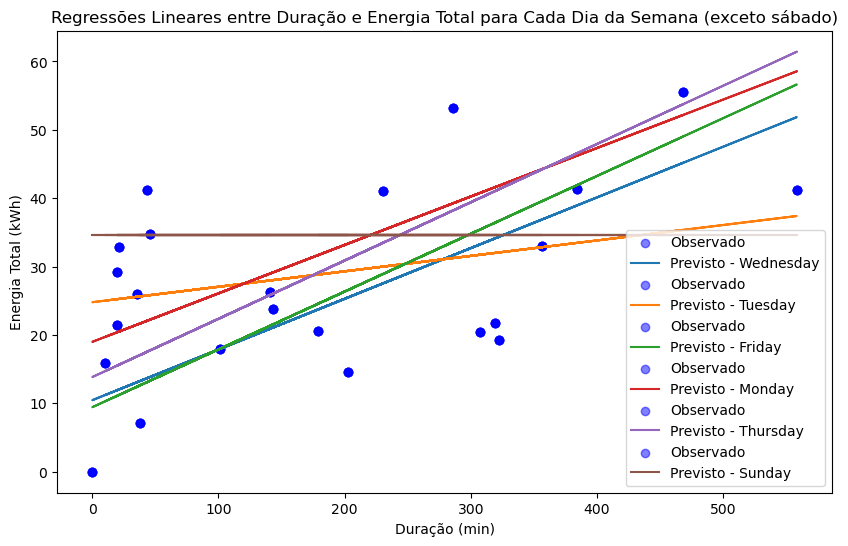

In [17]:

# Filtra os dados excluindo sábado
EV_filtered = EV[EV['Day of Week'] != 'Saturday']

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(EV_filtered[['Duration (min)']], EV_filtered['Total Energy (kWh)'], test_size=0.2, random_state=42)

# Inicialize o modelo de regressão linear
model = LinearRegression()

# Crie um único gráfico com todas as regressões lineares, excluindo sábado
plt.figure(figsize=(10, 6))

for day in EV_filtered['Day of Week'].unique():
    subset_X_train = X_train[X_train.index.isin(y_train[y_train.index.isin(EV_filtered[EV_filtered['Day of Week'] == day].index)].index)]
    subset_y_train = y_train[y_train.index.isin(EV_filtered[EV_filtered['Day of Week'] == day].index)]

    # Treine o modelo
    model.fit(subset_X_train, subset_y_train)

    # Faça previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Visualize os resultados
    plt.scatter(X_test, y_test, color='blue', label='Observado', alpha=0.5)
    plt.plot(X_test, y_pred, label=f'Previsto - {day}')

plt.title('Regressões Lineares entre Duração e Energia Total para Cada Dia da Semana (exceto sábado)')
plt.xlabel('Duração (min)')
plt.ylabel('Energia Total (kWh)')
plt.legend()
plt.show()


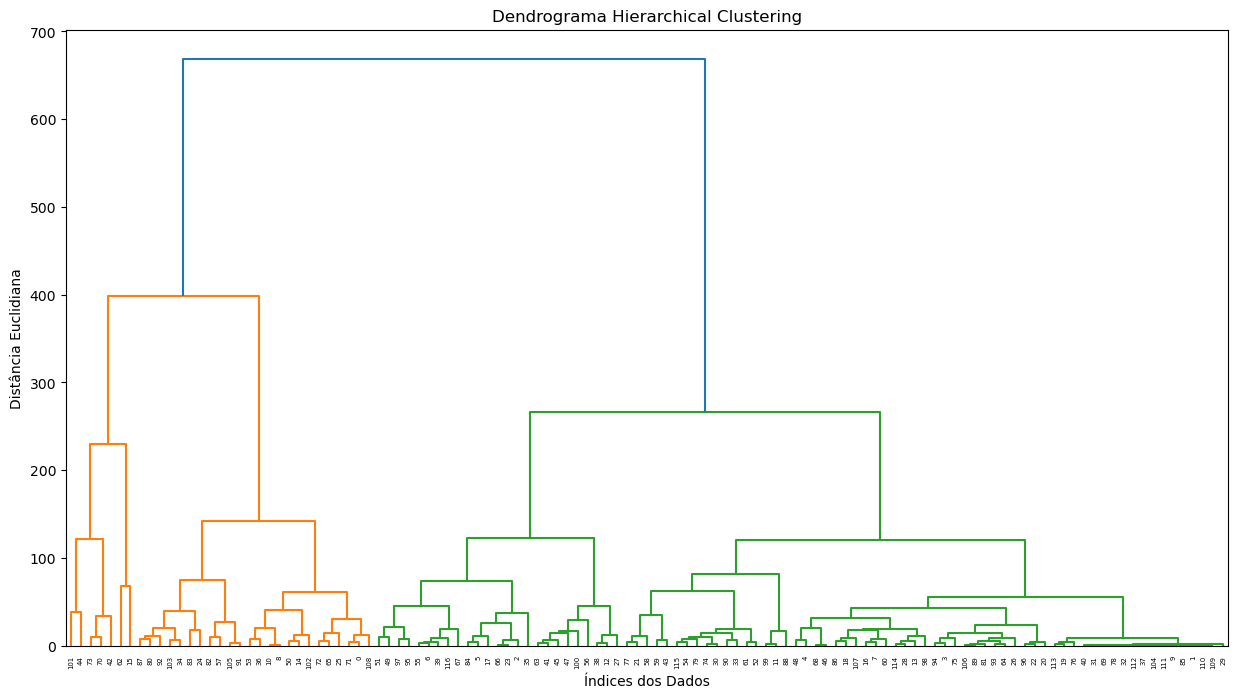

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Selecione as variáveis para clustering (por exemplo, 'Duration (min)' e 'Total Energy (kWh)')
X = EV[['Duration (min)', 'Total Energy (kWh)']]

# Execute o algoritmo Hierarchical Clustering usando a ligação completa (complete linkage)
linked = linkage(X, method='complete')

# Visualize o dendrograma
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='level')
plt.title('Dendrograma Hierarchical Clustering')
plt.xlabel('Índices dos Dados')
plt.ylabel('Distância Euclidiana')
plt.show()
